In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Introduction and Background

Sebuah perusahaan marketing diketahui ingin melakukan sebuah campaign\
promo untuk menarik lebih banyak pembeli untuk membeli produk tertentu.

Namun, perusahaan masih ragu campaign yang dibuat apakah efektif dalam meningkatkan penjualan atau tidak.\
Untuk itu seorang data analyst ditugaskan untuk membuat sebuah rancangan eksperimen untuk menentukan\
apakah sebuah campaign perlu untuk dilanjutkan, dimodifikasi atau diberhentikan.

# Setting Up Problems

#### 1. Tujuan Eksperimen
- menentukan performa sebuah campaign berupa ads apakah berpengaruh secara signifikan terhadap penjualan atau tidak.
- menentukan apakah implementasi ads dapat meningkatkan conversion rate secara signifikan lebih dari 1 persen atau tidak.

#### 2. Choosing Metrics

untuk dapat menentukan performa sebuah campaign digunakan metrics conversion rate\
yang merupakan nilai proporsi dari jumlah user yang mendaftar dibagi dari\
jumlah total user yang pernah melihat iklan

driver metrics: conversion rate

diketahui penyedia layanan periklanan mematok perhitungan biaya iklan berdasarkan penayangan (cost per view),\
sehingga hal ini dapat menjadikan total ad views sebagai guardrail metrics, karena semakin banyak penayangan\
namun tidak menghasilkan user yang converted, hal ini akan mengakibatkan biaya iklan yang membengkak.

guardrail metrics: total ad views

$$conversion\;rate = \frac{n_{user\, converted}}{n_{total \, user}} $$

#### 3. Define Variants

Untuk menentukan varian grup, digunakan iklan public service announcements sebagai kontrol
dan tampilan iklan yang menarik berupa warna yang lebih mencolok sebagai varian treatment.

Control: Public Service Announcements (psa)\
Treatment: ads with more striking colors (ad)

#### 4. Define Hypothesis

untuk menjawab tujuan pertama:\
h0: tidak terdapat perbedaan yang signifikan terhadap conversion rate akibat dari implementasi ads\
h1: terdapat perbedaan yang signifikan antara grup control dan treatment akibat dari implementasi ads
$$h_0 = \hat{p}_{treatment} \leq \hat{p}_{control}$$
$$h_1 = \hat{p}_{treatment} > \hat{p}_{control}$$



untuk menjawab tujuan kedua:\
h0: Ads is NOT significantly increase user conversion rate by 1%\
h1: Ads is significantly can increase user conversion rate by 1%
$$h_{0}=(\hat{p}_{treatment}-\hat{p}_{control}) \leq 1\% $$
$$h_{1}=(\hat{p}_{treatment}-\hat{p}_{control}) >  1\% $$ 

# Designing Experiment

1. Randomization Unit: user id
2. Target of Randomization Unit: user that at least view 1 ad
3. Sample Size\
   a. significant level ($\alpha)$: 0.05\
   b. power level (1-$\beta$): 0.8\
   c. variance of population ($\sigma^2$):  \
   d. difference between control and treatment ($\delta$)
4. How long running the experiment

Dalam mendesain eksperimen, kita perlu menentukan randomization unit,\
target of randomization unit, parameter untuk mencari sample size, dan\
waktu yang dibutuhkan untuk menjalankan eksperimen.

Dalam hal menentukan besaran sampel, kita perlu menentukan nilai parameter\
alpha, beta, varians populasi dan harapan perbedaan control dan treatment.

Untuk nilai alpha dan beta, kita menggunakan nilai masing-masing 5% dan 20%\
mengikuti rule of thumb yang biasanya digunakan dalam eksperimen statistik.

Untuk variance dari populasi, kita perlu mendapatkan prior information dari eksperimen sebelumnya,\
untuk itu kita tanyakan mbah google berapa rata-rata nilai conversion rate yang ada di industri biasanya.

Didapatkan informasi dari mbah google jika nilai conversion rate berada pada rentang 2% hingga 5%.\
Dari angka yang didapatkan ini kita dapat menentukan nilai varians dari populasi menggunakan rumus

$$ \sigma ^2 = \frac{N}{N-1}\cdot p(1-p) $$

kita asumsikan nilai jumlah total populasi mendekati tak hingga, sehingga rumusnya menjadi

$$ \sigma ^2 = p(1-p) $$

apabila kita misalkan nilai p = 5%,

In [2]:
p = 5/100

pop_var = p*(1-p)

pop_var

0.0475

kemudian untuk nilai difference between control and treatment\
didapatkan prior information bahwa akan lebih profitable apabila nilainya bertambah sebanyak minimal 1%

terdapat beberapa pertimbangan untuk menentukan lama berjalannya eksperimen, yakni:
- more users
- day of week effect
- seasonality
- primacy and novelty effect

sebelum menentukan lama berjalannya eksperimen,\
kita perlu menentukan sample size dari beberapa\
parameter yang telah kita tentukan sebelumnya menggunakan rumus:

$$ n\approx \frac{2\left ( Z_{\frac{\alpha }{2}} + Z_{\beta } \right )^{2}\sigma ^{2}}{\left ( \mu _{c}-\mu _{t} \right )^{2}} $$

In [3]:
alpha = 5/100
beta = 20/100
delta = 1/100
z_alpha = stats.norm.ppf(q=1-alpha/2)
z_beta = stats.norm.ppf(q=1-beta)

sample_size = int((2*(z_alpha + z_beta)**2 * pop_var)/(delta**2))
sample_size

7456

didapatkan nilai sample size yang disarankan untuk menjalankan eksperimen adalah sebanyak 7456 user id untuk 1 varian

setelah kita mengetahui berapa jumlah sample userid yang diperlukan,\
selanjutnya kita periksa pada website kita berapa banyak rata-rata unique userid yang\
mengunjungi website yang akan kita berikan iklan

berdasarkan prior information dari mbah google, website yang aktif\
memberikan konten setiap harinya akan cenderung mendapatkan pengunjung\
sebanyak hingga 15 ribu sampai 250 ribu pengunjung setiap bulannya.

apabila kita asumsikan website yang kita miliki memiliki rata-rata pengunjung\
sebanyak 15 ribu unique userid maka kita dapat menyimpulkan untuk dapat melakukan\
eksperimen a/b testing ini selama minimal **2 minggu**

# Running Experiment and Obtaining Data



Setelah 2 minggu eksperimen dilakukan, data yang telah tercatat dikumpulkan dan dijadikan menjadi satu file.

Dikarenakan pada project ini penulis tidak dapat mengambil data secara langsung karena keterbatasan fasilitas,\
digunakan dataset yang diambil dari kaggle https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing \
yang selanjutnya dilakukan stratified sampling agar dapat sesuai dengan desain eksperimen yang telah ditentukan.

Data yang diambil menggunakan metode stratified sampling ini hanya merupakan data dummy dan bisa jadi tidak menggambarkan karakteristik dataset yang sesungguhnya, dan bergantung pada kebetulan pengambilan sampling (by chance).

In [4]:
df = pd.read_csv("dataset/marketing_AB.csv", index_col=0)

In [5]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


#### Proses Sampling (Stratified Sampling)

In [6]:
# definisikan grup control dan grup treatment menggunakan simple random sampling
data_control = df[df["test group"]=="psa"].sample(n=sample_size)
data_treatment = df[df["test group"]=="ad"].sample(n=sample_size)

# gabungkan kedua data menjadi satu tabel
data = pd.concat([data_control, data_treatment])

# Analyzing and Interpreting Data

1. Ensure the trustworthiness\
   a. Check the data quality (missing value, duplicate data, distribution of data)\
   b. Data exploration (how many users in each group, and other insight from dataset that you choose)\
   c. Perform SRM test with chi-square test\
         https://towardsdatascience.com/detecting-sample-ratio-mismatch-in-your-a-b-tests-cf7771de950a \
         https://towardsdatascience.com/the-essential-guide-to-sample-ratio-mismatch-for-your-a-b-tests-96a4db81d7a4
2. Conduct hypothesis testing and analyze the result
3. Calculate confidence interval of difference between treatment and control

##### 1. Ensure The Trustworthiness

In [7]:
# memeriksa missing value
data.isna().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [8]:
# memeriksa data duplikat
data.duplicated().sum()

0

(array([[<Axes: title={'center': 'total ads'}>]], dtype=object),
 array([[<Axes: title={'center': 'most ads hour'}>]], dtype=object))

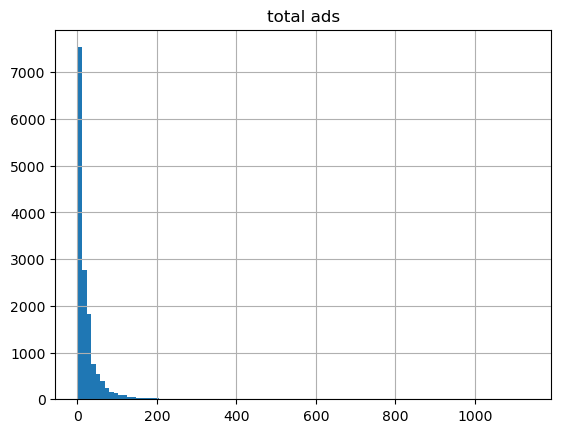

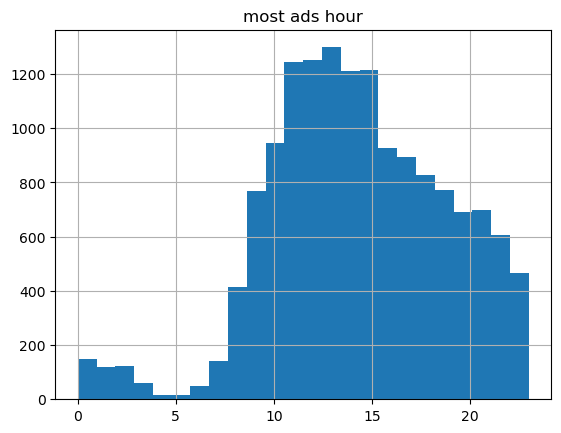

In [9]:
# cek distribusi data untuk kolom "total ads" dan "most ads hour"
data.hist(column="total ads", bins=100), data.hist(column="most ads hour", bins=24)

##### Calculate Conversion Rate and The Difference

In [10]:
# how many users in each group
n_user_control = data[data["test group"] == "psa"]["user id"].nunique()
n_user_treatment = data[data["test group"] == "ad"]["user id"].nunique()

print(f"jumlah user pada group control adalah sebanyak {n_user_control} user id")
print(f"jumlah user pada group treatment adalah sebanyak {n_user_treatment} user id")

jumlah user pada group control adalah sebanyak 7456 user id
jumlah user pada group treatment adalah sebanyak 7456 user id


In [11]:
# how many user converted in each group
n_converted_control = data[(data["test group"] == "psa") & (data["converted"] == True)].shape[0]
n_converted_treatment = data[(data["test group"] == "ad") & (data["converted"] == True)].shape[0]

print(f"jumlah user yang converted pada group control adalah sebanyak {n_converted_control} user id")
print(f"jumlah user yang converted pada group treatment adalah sebanyak {n_converted_treatment} user id")

jumlah user yang converted pada group control adalah sebanyak 125 user id
jumlah user yang converted pada group treatment adalah sebanyak 182 user id


In [12]:
# conversion rate

cr_control = n_converted_control / n_user_control
cr_treatment = n_converted_treatment / n_user_treatment

diff = cr_treatment - cr_control

cr_control*100, cr_treatment*100, diff*100

(1.6765021459227467, 2.4409871244635193, 0.7644849785407727)

<Axes: >

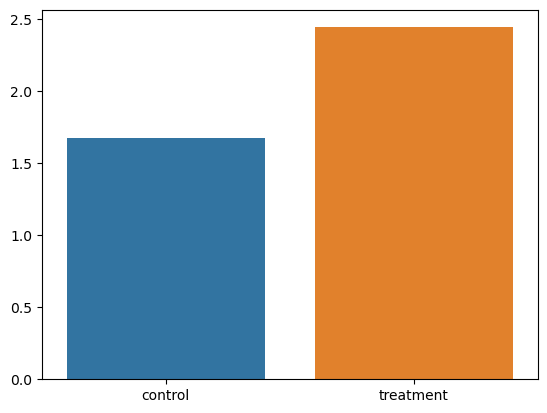

In [73]:
sns.barplot(x=['control','treatment'],y=[cr_control*100,cr_treatment*100])

##### Perform Hypothesis Testing 1

$$h_0 = \hat{p}_{treatment} \leq \hat{p}_{control}$$
$$h_1 = \hat{p}_{treatment} > \hat{p}_{control}$$

$$z_{score} = \frac{\hat{p}-p_{0}}{\sqrt{p_{0}(1-p_{0})/n}}$$

In [39]:
z_score = diff/np.sqrt((cr_control*(1-cr_control))/int(sample_size))
z_score

5.1415159698693715

In [32]:
z_crit = stats.norm.ppf(1-alpha)

In [33]:
z_crit

1.6448536269514722

In [40]:
p_value = 1-stats.norm.cdf(z_score)
f"{p_value:.2f}"

'0.00'

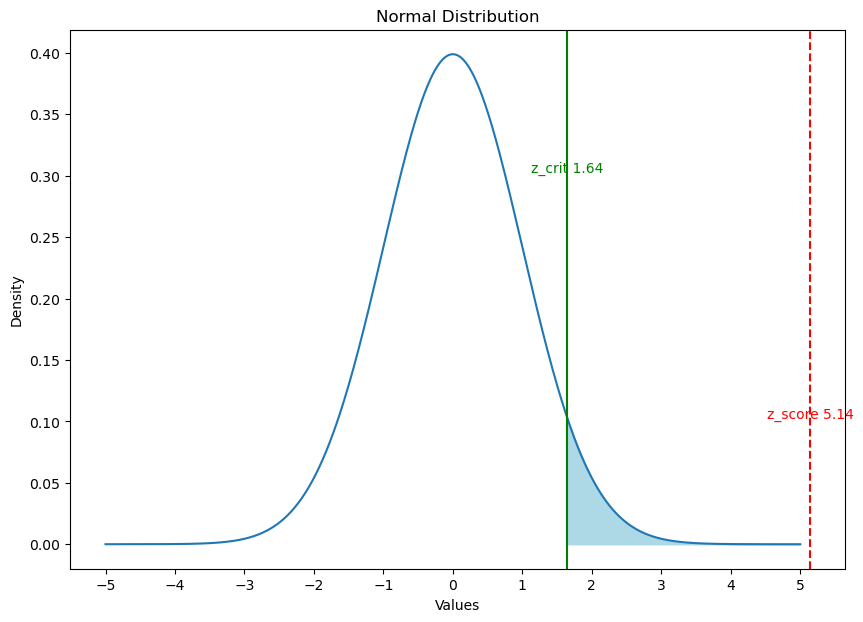

p-value: 0.00
reject null hypothesis, treatment are greater than the control


In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
mean = 0
std = 1

x = np.linspace(-5, 5, 1000)

y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))

sns.lineplot(x=x, y=y)


# Add a vertical line z_score
plt.axvline(x=z_score, color='red', linestyle='--')
# Add label to the vertical line z_score
label = f'z_score {z_score:.2f}'
plt.text(z_score, 0.1, label, va='bottom', ha='center', color='red')

#add a vertical line z_crit
plt.axvline(x=z_crit, color='green', linestyle='-')
# Add label to the vertical line z_crit
label = f'z_crit {z_crit:.2f}'
plt.text(z_crit, 0.3, label, va='bottom', ha='center', color='green')

filt_idx_r=[idx for idx, value in enumerate(x) if value>=z_crit]
plt.fill_between(x[filt_idx_r], y[filt_idx_r],color ='lightblue')


plt.title('Normal Distribution')
plt.xlabel('Values')
plt.ylabel('Density')
plt.xticks(np.arange(-5, 6, 1))



plt.show()

print(f'p-value: {p_value:.2f}')
if p_value < alpha:
    print("reject null hypothesis, treatment are greater than the control")
else:
    print("accept h0, the difference is not significant")

berdasarkan analisa single sample z-test, dapat disimpulkan bahwa\
conversion rate grup treatment secara signifikan lebih besar daripada conversion rate pada grup control

##### Perform Hypothesis Testing 2

$$h_{0}=(\hat{p}_{treatment}-\hat{p}_{control}) \leq 1\% $$
$$h_{1}=(\hat{p}_{treatment}-\hat{p}_{control}) >  1\% $$ 

In [48]:
z_crit = stats.norm.ppf(1-alpha)
z_crit

1.6448536269514722

In [49]:
p1_treatment = cr_treatment
p0_control = cr_control
D_0 = delta
n_1 = n_user_treatment
n_0 = n_user_control
p1_var = p1_treatment*(1-p1_treatment)/n_1
p0_var = p0_control*(1-p0_control)/n_0

z_score = (p1_treatment-p0_control-D_0)/np.sqrt((p1_var)+(p0_var))
z_score

-1.0130477043852086

In [50]:
p_value = 1-stats.norm.cdf(z_score)
p_value

0.8444813122734294

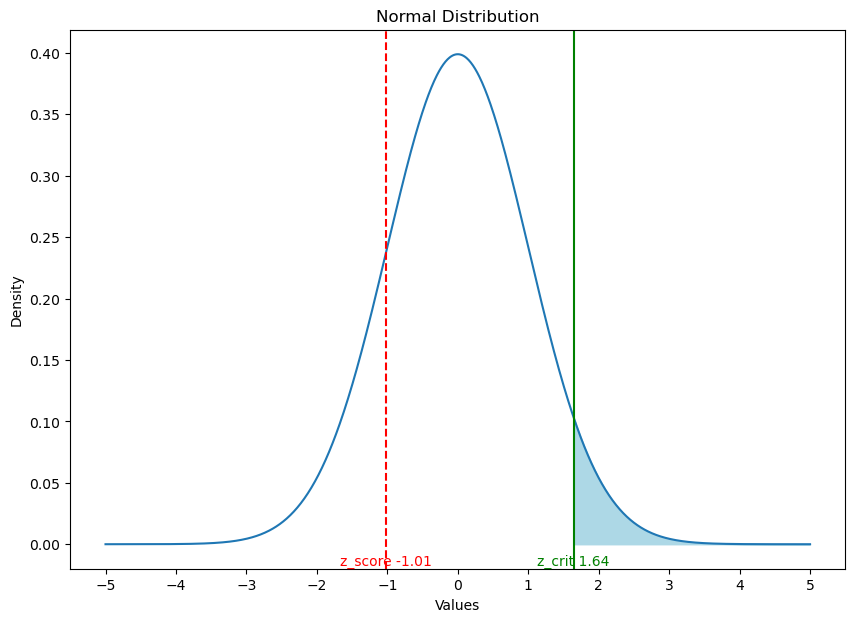

p-value: 0.84
accept h0, the difference is not significant


In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
mean = 0
std = 1

x = np.linspace(-5, 5, 1000)

y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))

sns.lineplot(x=x, y=y)

# Add a vertical line z_score
plt.axvline(x=z_score, color='red', linestyle='--')
# Add label to the vertical line z_score
label = f'z_score {z_score:.2f}'
plt.text(z_score, plt.ylim()[0], label, va='bottom', ha='center', color='red')

#add a vertical line z_crit
plt.axvline(x=z_crit, color='green', linestyle='-')
# Add label to the vertical line z_crit
label = f'z_crit {z_crit:.2f}'
plt.text(z_crit, plt.ylim()[0], label, va='bottom', ha='center', color='green')

#raster bagian alpha
filt_idx_r=[idx for idx, value in enumerate(x) if value>=z_crit]
plt.fill_between(x[filt_idx_r], y[filt_idx_r],color ='lightblue')


plt.title('Normal Distribution')
plt.xlabel('Values')
plt.ylabel('Density')
plt.xticks(np.arange(-5, 6, 1))



plt.show()

print(f'p-value: {p_value:.2f}')
if p_value < alpha:
    print("reject null hypothesis, treatment are greater than the control")
else:
    print("accept h0, the difference is not significant")

##### Calculate Confidence Interval

In [58]:
z_alpha2 = stats.norm.ppf(1-alpha/2)
se_diff = np.sqrt(p1_var+p0_var)
moe =  z_alpha2*se_diff
upper_limit = diff + moe
lower_limit = diff - moe
print(f"kita {(1-alpha)*100:.0f}% yakin bahwa perbedaan user conversion rate \
pada group treatment dan group control berada di antara \
{lower_limit*100:.2f}% hingga {upper_limit*100:.2f}%")

kita 95% yakin bahwa perbedaan user conversion rate pada group treatment dan group control berada di antara 0.31% hingga 1.22%


## Make conclusion and recommendation

- The conclusions from the previous analysis, statistically significant or not?
    - Untuk uji hipotesis yang pertama, hasilnya adalah signifikan, bahwa dari kedua varian grup dapat dipastikan terdapat perbedaan
    - untuk uji hipotesis yang kedua, hasilnya adalah tidak signifikan, perbedaan dari kedua grup varian tidak dapat melebihi 1%
    -


- Recommendations for the business
  When making recommendations, consider other things in the business such as costs etc., whether they are practically significant or not. You can coompare confidence interval of statistics with the confidence interval in practical.
  
- Recommendation for the next experiment
  From the results of the current experiment, if you want to do a similar experiment but with a different variant, what do you recommend?

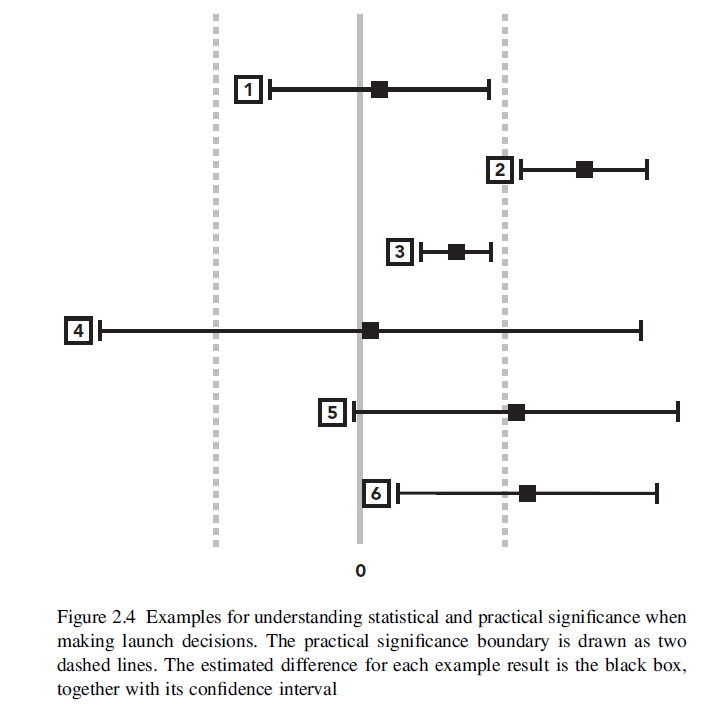

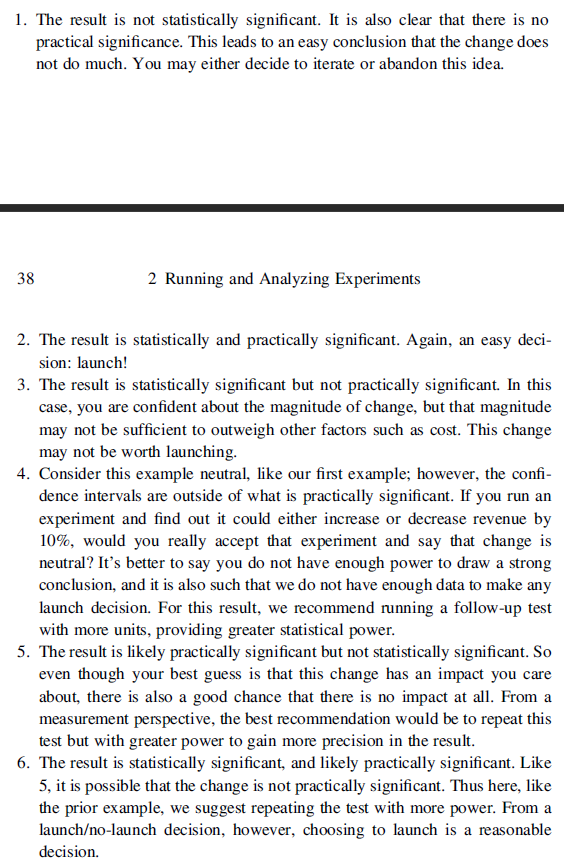

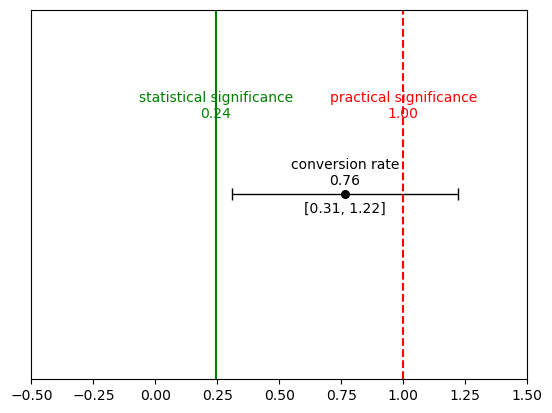

In [68]:
labelstr = ['name1'] 
values = [diff*100]
lower_bound =  [lower_limit*100]
upper_bound =  [upper_limit*100]

xerr = [
    [value-lower for value, lower in zip(values, lower_bound)],
    [upper-value for value, upper in zip(values, upper_bound)],
]


fig, ax = plt.subplots()
ax.scatter(values, labelstr, c='black', s=30, marker='o')
ax.set_ylim(-0.5, len(labelstr) - 0.5) # add some vertical padding
ax.set_xlim(-0.5,1.5)
ax.set_yticks([])

ax.errorbar(values, labelstr, xerr=xerr,
    fmt='none',     # don't connect data points
    ecolor='black', # color of error lines
    elinewidth=1,   # width of error lines
    capsize=4,      # length of error caps
    zorder=-1,      # put error bars behind scatter points
)


stat_sig = z_crit * np.sqrt(((cr_control)*(1-cr_control))/int(sample_size)) *100
plt.axvline(x=stat_sig, color='green', linestyle='-')
plt.text(x=stat_sig, y=0.2, s= f'statistical significance\n{stat_sig:.2f}', va='bottom', ha='center', color='green')

prac_sig = delta * 100
plt.axvline(x=prac_sig, color='red', linestyle='--')
plt.text(x=prac_sig, y=0.2, s= f'practical significance\n{prac_sig:.2f}', va='bottom', ha='center', color='red')

for value, lower, upper, label, color in zip(values, lower_bound, upper_bound, labelstr, colors):
    shared = dict(xy=(value, label), color='black', textcoords='offset points', ha='center')
    ax.annotate(f'conversion rate\n{value:.2f}', xytext=(0, 5), va='bottom', **shared)
    ax.annotate(f'[{lower:.2f}, {upper:.2f}]', xytext=(0, -5), va='top', **shared)

<p align="center">
  <img src="https://i.stack.imgur.com/aReEH.jpg" alt="Proportions Z test"/>
</p>

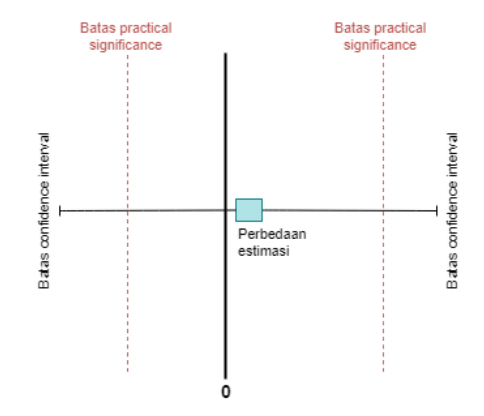

In [26]:
def compare_two_proportions(mean1,std1,mean2,std2):
    mean1 = mean1*100
    std1 = std1*100

    mean2 = mean2*100
    std2 = std2*100

    x = np.linspace(mean2-(mean2*0.5), mean1+(mean1*0.5), 1000)

    y1 = (1 / (std1 * np.sqrt(2 * np.pi))) * np.exp(-(x - mean1)**2 / (2 * std1**2))
    y2 = (1 / (std2 * np.sqrt(2 * np.pi))) * np.exp(-(x - mean2)**2 / (2 * std2**2))

    z_crit = stats.norm.ppf(1-alpha)
    crit = mean2 + z_crit*std2
    filt_idx_r=[idx for idx, value in enumerate(x) if value>=crit]
    filt_idx_l=[idx for idx, value in enumerate(x) if value<=crit]
    
    lightorange_rgb= (1.0,0.7,0.4)
    
    sns.lineplot(x=x, y=y1, label='Treatment', color='blue')
    plt.fill_between(x[filt_idx_l], y1[filt_idx_l],color ='lightblue')
    
    #plt.axvline(x=mean1, color='blue', linestyle='-')
    label = f'mean:\n{mean1:.2f}'
    plt.text(mean1, 1.0, label, va='bottom', ha='center', color='blue')
    
    sns.lineplot(x=x, y=y2, label='Control', color='orange')
    plt.fill_between(x[filt_idx_r], y2[filt_idx_r], facecolor = lightorange_rgb)
    
    #plt.axvline(x=mean2, color='orange', linestyle='-')
    label = f'mean:\n{mean2:.2f}'
    plt.text(mean2, 1.4, label, va='bottom', ha='center', color='orange')
    
    plt.axvline(x=crit, color='green', linestyle='-')
    label = f'crit_value:\n{crit:.2f}'
    plt.text(crit, 0.2, label, va='bottom', ha='center', color='green')

    plt.title('Two Normal Distributions')
    plt.xlabel('User Conversion Rate (%)')
    plt.ylabel('Density')

    plt.legend()
    plt.show()

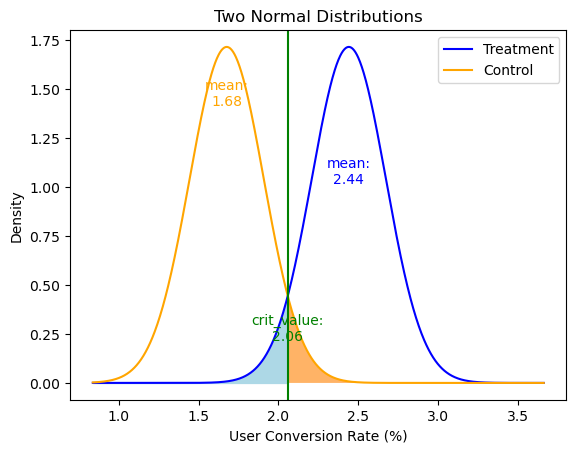

In [27]:
compare_two_proportions(p1_treatment,np.sqrt((p1_var)+(p0_var)),p0_control,np.sqrt((p1_var)+(p0_var)))